In [84]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_excel ('/content/drive/MyDrive/Colab Notebooks/datasets/Base de Vendas Varejo.xlsx')

In [86]:
# Verificando o tipo de dados
df.dtypes

Row ID                             float64
Order ID                           float64
Data da Venda               datetime64[ns]
Prioridade                          object
Quantidade                         float64
Valor da Venda                     float64
Desconto                           float64
Forma de Envio                      object
Lucro                              float64
Preço Unitário                     float64
Custo de Envio                     float64
Nome do Cliente                     object
Cidade                              object
CEP                                float64
Estado                              object
Região                              object
País                                object
Segmento do Cliente                 object
Categoria do Produto                object
Sub-Categoria do Produto            object
Nome do Produto                     object
Embalagem                           object
Margem                             float64
Data de Env

In [149]:
# Criando coluna 'Tempo envio' e Extraindo o tempo de envio
df ['Tempo envio'] = df['Data de Envio'] - df['Data da Venda']

In [157]:
df.head()

,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,...,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio,Tempo envio
0,674.00,"4,706.00",2012-12-28,Não Especificada,30.00,"2,116.70",0.02,Aéreo Normal,488.82,67.28,...,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Capas e Acessórios,Catalog Binders with Expanding Posts,Small Box,0.40,2012-12-30,2 days
1,816.00,"5,891.00",2012-12-28,Média,2.00,44.45,0.01,Aéreo Normal,-17.46,20.98,...,Nordeste,Brasil,Escritório em Casa,Material de Escritório,Capas e Acessórios,Avery Legal 4-Ring Binder,Small Box,0.35,2012-12-30,2 days
2,"1,876.00","13,507.00",2012-12-29,Média,27.00,176.10,0.09,Aéreo Normal,-75.71,6.78,...,Norte,Brasil,Pequenas Empresas,Material de Escritório,Papel,Strathmore Photo Mount Cards,Small Box,0.39,2012-12-30,1 days
3,"3,583.00","25,542.00",2012-12-30,Baixa,37.00,257.46,0.09,Aéreo Rápido,-18.66,7.28,...,Centro-Oeste,Brasil,Escritório em Casa,Material de Escritório,Papel,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",Wrap Bag,0.39,2012-12-30,0 days
4,"4,008.00","28,611.00",2012-12-27,Baixa,30.00,"15,337.58",0.10,Aéreo Normal,"6,670.41",525.98,...,Sudeste,Brasil,Consumidor,Material de Escritório,Capas e Acessórios,GBC DocuBind 300 Electric Binding Machine,Small Box,0.37,2012-12-30,3 days


In [6]:
# Fortamando os numeros float
pd.set_option ('float_format','{:,.2f}'.format)

In [7]:
# Tempo maximo de atraso
df['Tempo envio'].max()

Timedelta('92 days 00:00:00')

In [129]:
# Procurando em qual estado foi esse atrado
df.groupby ('Estado') ['Tempo envio'].max()

# Chegamos em Pernanbuco sendo o Estado com maior tempo de demora
# Tambem temos uma visualização de quais outros estados diveram picos altos de demora 

Estado
Alagoas                9 days 00:00:00
Amazonas               7 days 01:01:30
Bahia                  9 days 00:00:00
Ceará                  7 days 00:00:00
Distrito Federal       7 days 00:00:00
Espírito Santo         9 days 00:00:00
Goiás                 84 days 00:00:00
Maranhão               7 days 00:00:00
Mato Grosso            9 days 00:00:00
Mato Grosso do Sul    15 days 00:00:00
Minas Gerais           9 days 00:00:00
Paraná                19 days 00:00:00
Paraíba                9 days 00:00:00
Pará                   7 days 00:00:00
Pernambuco            92 days 00:00:00
Piauí                  9 days 00:00:00
Rio Grande do Norte    9 days 00:00:00
Rio Grande do Sul     22 days 00:00:00
Rio de Janeiro         9 days 00:00:00
Santa Catarina        19 days 00:00:00
Sergipe                9 days 00:00:00
São Paulo             31 days 00:00:00
Tocantins              9 days 00:00:00
Name: Tempo envio, dtype: timedelta64[ns]

In [137]:
# Isolando pernambuco para ver o por que do atraso de 92 dias
df_atraso = df[df['Estado'] == 'Pernambuco']

In [138]:
df_atraso.head()

,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,...,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio,Tempo envio
0,674.00,"4,706.00",2012-12-28,Não Especificada,30.00,"2,116.70",0.02,Aéreo Normal,488.82,67.28,...,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Capas e Acessórios,Catalog Binders with Expanding Posts,Small Box,0.40,2012-12-30,2 days
11,"7,141.00","50,950.00",2012-12-30,Não Especificada,6.00,391.12,0.06,Transporte Rodoviário,-166.96,60.98,...,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Novimex Fabric Task Chair,Jumbo Drum,0.70,2012-12-30,0 days
12,"7,142.00","50,950.00",2012-12-30,Não Especificada,35.00,448.10,0.10,Aéreo Rápido,-15.07,13.48,...,Nordeste,Brasil,Corporativo,Material de Escritório,Armazenamento e Organização,Tenex Personal Project File with Scoop Front D...,Small Box,0.59,2012-12-30,0 days
25,"4,159.00","29,505.00",2012-12-27,Média,22.00,45.21,0.02,Aéreo Rápido,4.61,1.76,...,Nordeste,Brasil,Escritório em Casa,Material de Escritório,Canetas e materiais de arte,Newell 326,Wrap Bag,0.56,2012-12-28,1 days
30,"1,451.00","10,466.00",2012-12-25,Alta,27.00,114.86,0.07,Aéreo Normal,16.21,4.28,...,Nordeste,Brasil,Corporativo,Material de Escritório,Canetas e materiais de arte,Newell 336,Wrap Bag,0.56,2012-12-26,1 days


In [141]:
# Identificando qual o produto que demorou mais tempo para ser enviado
df_atraso.groupby ('Sub-Categoria do Produto') ['Tempo envio'].max()

Sub-Categoria do Produto
Armazenamento e Organização      7 days
Cadeiras                        17 days
Canetas e materiais de arte     92 days
Capas e Acessórios               9 days
Copiadoras e fax                 7 days
Eletrodomésticos                 9 days
Elásticos                        5 days
Envelopes                        9 days
Estantes                         5 days
Etiquetas                        9 days
Mesas                            9 days
Mobiliário de Escritório         9 days
Máquinas de Escritório           7 days
Papel                           11 days
Periféricos                      9 days
Telefones e Comunicação         28 days
Tesouras, réguas e aparadores    4 days
Name: Tempo envio, dtype: timedelta64[ns]

In [143]:
# Tivemos algum problema com envio aereo ao trasportar Canetas e materiais de arte ?
df_atraso.groupby ('Forma de Envio') ['Tempo envio'].max()

Forma de Envio
Aéreo Normal            92 days
Aéreo Rápido             7 days
Transporte Rodoviário   17 days
Name: Tempo envio, dtype: timedelta64[ns]

In [10]:
# Região com menor Lucro
df.groupby ('Região') ['Lucro'].sum()

Região
Centro-Oeste   454,271.57
Nordeste       298,425.81
Norte           28,711.42
Sudeste        317,852.04
Sul            422,507.11
Name: Lucro, dtype: float64

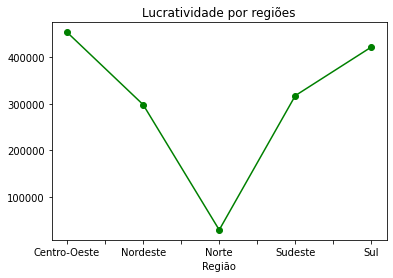

In [11]:
# Grafico
df.groupby('Região')['Lucro'].sum().plot(title = 'Lucratividade por regiões', marker = 'o', color = 'g');

In [12]:
# Estados com menor lucro
df.groupby ('Estado') ['Lucro'].sum()

Estado
Alagoas                39,829.33
Amazonas                4,105.47
Bahia                  32,868.58
Ceará                   3,976.83
Distrito Federal        2,789.60
Espírito Santo         49,640.67
Goiás                 319,560.57
Maranhão               24,286.34
Mato Grosso            42,215.90
Mato Grosso do Sul     89,705.51
Minas Gerais           37,783.34
Paraná                176,052.22
Paraíba                20,386.20
Pará                    4,264.20
Pernambuco             94,740.39
Piauí                  44,182.24
Rio Grande do Norte    23,151.67
Rio Grande do Sul     136,719.80
Rio de Janeiro         14,399.59
Santa Catarina        109,735.09
Sergipe                15,004.22
São Paulo             216,028.44
Tocantins              20,341.75
Name: Lucro, dtype: float64

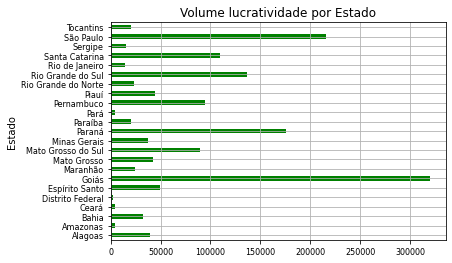

In [13]:
# Gráfico com maior lucratividade
df.groupby ('Estado') ['Lucro'].sum().plot.barh(title = 'Volume lucratividade por Estado', color = 'g', fontsize = 8)
plt.grid ()

In [14]:
# Verificando quais tipos de cliente possuem um volume maior de compras
df.groupby ('Segmento do Cliente') ['Quantidade'].sum()


Segmento do Cliente
Consumidor           41,760.00
Corporativo          78,517.00
Escritório em Casa   52,807.00
Pequenas Empresas    41,693.00
Name: Quantidade, dtype: float64

In [25]:
# Verificando qual região com maior volume de vendas por segmento de cliente
df.groupby (['Segmento do Cliente', 'Região']) ['Quantidade'].sum()

Segmento do Cliente  Região      
Consumidor           Centro-Oeste   10,590.00
                     Nordeste       10,379.00
                     Norte             753.00
                     Sudeste         9,700.00
                     Sul            10,338.00
Corporativo          Centro-Oeste   26,876.00
                     Nordeste       16,433.00
                     Norte           2,566.00
                     Sudeste        15,092.00
                     Sul            17,550.00
Escritório em Casa   Centro-Oeste   16,023.00
                     Nordeste       11,832.00
                     Norte           1,518.00
                     Sudeste        11,335.00
                     Sul            12,099.00
Pequenas Empresas    Centro-Oeste   10,669.00
                     Nordeste       11,037.00
                     Norte           1,110.00
                     Sudeste        11,614.00
                     Sul             7,263.00
Name: Quantidade, dtype: float64

In [26]:
# Verificar qual Estado com maior volume de vendas com cliente corporativos

df_corporativo = df[df['Segmento do Cliente'] == 'Corporativo']

In [31]:
df_corporativo.head()

,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,...,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio,Tempo envio
11,"7,141.00","50,950.00",2012-12-30,Não Especificada,6.00,391.12,0.06,Transporte Rodoviário,-166.96,60.98,...,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Novimex Fabric Task Chair,Jumbo Drum,0.70,2012-12-30,0 days
12,"7,142.00","50,950.00",2012-12-30,Não Especificada,35.00,448.10,0.10,Aéreo Rápido,-15.07,13.48,...,Nordeste,Brasil,Corporativo,Material de Escritório,Armazenamento e Organização,Tenex Personal Project File with Scoop Front D...,Small Box,0.59,2012-12-30,0 days
13,"7,524.00","53,730.00",2012-12-29,Alta,40.00,181.80,0.05,Aéreo Normal,-144.74,4.54,...,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,"Avery® Durable Plastic 1"" Binders",Small Box,0.36,2012-12-30,1 days
17,"4,106.00","29,220.00",2012-12-29,Média,36.00,"12,690.33",0.08,Aéreo Rápido,"5,045.30",367.99,...,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,Ibico Ibimaster 300 Manual Binding System,Small Box,0.40,2012-12-29,0 days
18,"4,834.00","34,400.00",2012-12-24,Baixa,17.00,988.64,0.04,Aéreo Normal,89.89,65.99,...,Sul,Brasil,Corporativo,Tecnologia,Telefones e Comunicação,5170,Small Box,0.59,2012-12-29,5 days


In [153]:
# Verificando quais tipos de produtos são mais vendidos para clientes do segmento corporativo
# Caculando a quantidade de valor de venda por produto + o lucro
df_corporativo.groupby ('Sub-Categoria do Produto') ['Quantidade','Valor da Venda','Lucro'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Quantidade,Valor da Venda,Lucro
Sub-Categoria do Produto,,,
Armazenamento e Organização,"4,503.00","324,545.88","-2,086.83"
Cadeiras,"3,732.00","677,586.32","39,370.10"
Canetas e materiais de arte,"6,242.00","60,860.17","1,670.40"
Capas e Acessórios,"8,530.00","403,750.19","125,811.27"
Copiadoras e fax,713.00,"364,175.62","28,654.48"
Eletrodomésticos,"4,326.00","296,465.34","50,095.94"
Elásticos,"1,691.00","4,759.25",-353.54
Envelopes,"2,257.00","57,962.50","15,082.58"
Estantes,"1,632.00","293,190.79","-9,305.76"


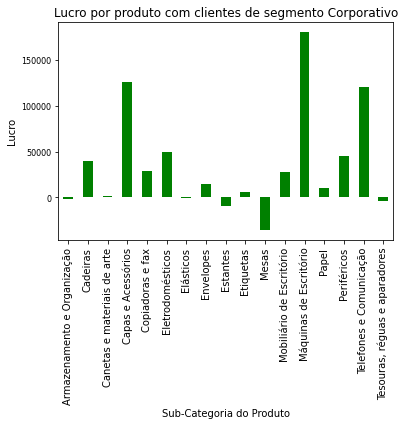

In [154]:
# Grafico representando o lucro por sub categoria de produto
df_corporativo.groupby ('Sub-Categoria do Produto') ['Lucro'].sum().plot.bar( title = 'Lucro por produto com clientes de segmento Corporativo', color = 'g')

plt.ylabel ('Lucro')
plt.yticks (fontsize = 8)
plt.xticks (rotation = 'vertical');

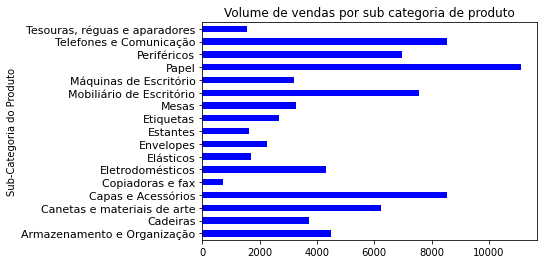

In [155]:
# Grafico representando o volume de vendas por sub categoria de produto

df_corporativo.groupby ('Sub-Categoria do Produto') ['Quantidade']. sum ().plot.barh(title = 'Volume de vendas por sub categoria de produto', color = 'b')
plt.yticks (fontsize = 11);

In [78]:
df_corporativo.groupby ('Região') ['Quantidade'].sum()

Região
Centro-Oeste   26,876.00
Nordeste       16,433.00
Norte           2,566.00
Sudeste        15,092.00
Sul            17,550.00
Name: Quantidade, dtype: float64

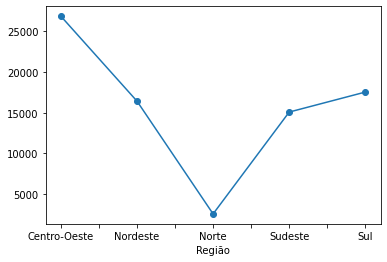

In [156]:
df_corporativo.groupby ('Região') ['Quantidade'].sum().plot(marker = 'o');

In [150]:
df_corporativo.head()

,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Lucro,Preço Unitário,Custo de Envio,Cidade,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Data de Envio,Tempo envio
11,2012-12-30,Não Especificada,6.00,391.12,0.06,-166.96,60.98,30.00,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Novimex Fabric Task Chair,2012-12-30,0 days
12,2012-12-30,Não Especificada,35.00,448.10,0.10,-15.07,13.48,4.51,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Material de Escritório,Armazenamento e Organização,Tenex Personal Project File with Scoop Front D...,2012-12-30,0 days
13,2012-12-29,Alta,40.00,181.80,0.05,-144.74,4.54,5.83,Ribeirão Pires,São Paulo,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,"Avery® Durable Plastic 1"" Binders",2012-12-30,1 days
17,2012-12-29,Média,36.00,"12,690.33",0.08,"5,045.30",367.99,19.99,São Paulo,São Paulo,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,Ibico Ibimaster 300 Manual Binding System,2012-12-29,0 days
18,2012-12-24,Baixa,17.00,988.64,0.04,89.89,65.99,4.20,Loanda,Paraná,Sul,Brasil,Corporativo,Tecnologia,Telefones e Comunicação,5170,2012-12-29,5 days


In [116]:
# Excluindo colunas e atribuindo a df_corporativo
df_corporativo.drop(columns=['Prioridade'])

,Data da Venda,Quantidade,Valor da Venda,Desconto,Lucro,Preço Unitário,Custo de Envio,Cidade,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Data de Envio,Tempo envio
11,2012-12-30,6.00,391.12,0.06,-166.96,60.98,30.00,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Novimex Fabric Task Chair,2012-12-30,0 days
12,2012-12-30,35.00,448.10,0.10,-15.07,13.48,4.51,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Material de Escritório,Armazenamento e Organização,Tenex Personal Project File with Scoop Front D...,2012-12-30,0 days
13,2012-12-29,40.00,181.80,0.05,-144.74,4.54,5.83,Ribeirão Pires,São Paulo,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,"Avery® Durable Plastic 1"" Binders",2012-12-30,1 days
17,2012-12-29,36.00,"12,690.33",0.08,"5,045.30",367.99,19.99,São Paulo,São Paulo,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,Ibico Ibimaster 300 Manual Binding System,2012-12-29,0 days
18,2012-12-24,17.00,988.64,0.04,89.89,65.99,4.20,Loanda,Paraná,Sul,Brasil,Corporativo,Tecnologia,Telefones e Comunicação,5170,2012-12-29,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,2009-01-03,12.00,522.49,0.08,-236.43,43.22,16.71,Florianópolis,Santa Catarina,Sul,Brasil,Corporativo,Tecnologia,Periféricos,"Fellowes Mobile Numeric Keypad, Graphite",2009-01-05,2 days
8383,2009-01-03,4.00,896.49,0.00,-452.27,213.45,14.70,Natal,Rio Grande do Norte,Nordeste,Brasil,Corporativo,Tecnologia,Máquinas de Escritório,Panasonic KX-P2130 Dot Matrix Printer,2009-01-05,2 days
8384,2009-01-03,15.00,85.56,0.03,-41.58,5.28,5.66,Eldorado,Mato Grosso do Sul,Centro-Oeste,Brasil,Corporativo,Material de Escritório,Papel,Xerox 4200 Series MultiUse Premium Copy Paper ...,2009-01-05,2 days
8391,2009-01-02,43.00,"4,083.19",0.07,"-1,049.85",100.98,45.00,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Hon Valutask™ Swivel Chairs,2009-01-04,2 days


In [117]:
df_corporativo.head()

,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Lucro,Preço Unitário,Custo de Envio,Cidade,Estado,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Data de Envio,Tempo envio
11,2012-12-30,Não Especificada,6.00,391.12,0.06,-166.96,60.98,30.00,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Mobiliário,Cadeiras,Novimex Fabric Task Chair,2012-12-30,0 days
12,2012-12-30,Não Especificada,35.00,448.10,0.10,-15.07,13.48,4.51,Recife,Pernambuco,Nordeste,Brasil,Corporativo,Material de Escritório,Armazenamento e Organização,Tenex Personal Project File with Scoop Front D...,2012-12-30,0 days
13,2012-12-29,Alta,40.00,181.80,0.05,-144.74,4.54,5.83,Ribeirão Pires,São Paulo,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,"Avery® Durable Plastic 1"" Binders",2012-12-30,1 days
17,2012-12-29,Média,36.00,"12,690.33",0.08,"5,045.30",367.99,19.99,São Paulo,São Paulo,Sudeste,Brasil,Corporativo,Material de Escritório,Capas e Acessórios,Ibico Ibimaster 300 Manual Binding System,2012-12-29,0 days
18,2012-12-24,Baixa,17.00,988.64,0.04,89.89,65.99,4.20,Loanda,Paraná,Sul,Brasil,Corporativo,Tecnologia,Telefones e Comunicação,5170,2012-12-29,5 days


In [128]:
df_corporativo.groupby ('Estado') ['Quantidade', 'Valor da Venda', 'Lucro'].sum()

# Em qual estado clientes de segmento corporativo possuem um maior volume de vendas ? Resposta: Clientes de segmento corporativo do Estado de Goiás possuem um maior volume de vensdas
# Qual estado mais lucrativo? Resposta: Goiás com R$:129,647.38 de lucro
# Qual o estado menos lucrativo ? Resposta: Amazona, com R$:-7.83 perda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Quantidade,Valor da Venda,Lucro
Estado,,,
Alagoas,939.00,"61,997.70","5,626.00"
Amazonas,642.00,"53,130.69",-7.83
Bahia,"1,797.00","157,227.35","17,698.77"
Ceará,535.00,"15,484.12","1,387.54"
Distrito Federal,755.00,"79,289.40","-5,134.78"
Espírito Santo,"2,256.00","137,035.85","4,368.62"
Goiás,"16,644.00","1,139,798.44","129,647.38"
Maranhão,482.00,"12,162.78",-763.30
Mato Grosso,"3,403.00","229,859.58","29,567.67"
